# Team Name: Quant_Boys
# Name and ID of Member 1: Rudrajit Dey (B2430055)
# Name and ID of Member 2: Arnab Banerjee (B2430040)

# Import Files

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# Add all other libraries you would require
import math
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from numpy.linalg import svd

# Loading Data
**Instruction**: Load the chosen dataset and display its basic information and statistics. You may use any well-known dataset.

In [4]:
# Loading a particular dataset

df = pd.read_csv('NSEI 2015-2023.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,101900
1,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,118200
2,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,172800
3,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,164100
4,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,143800


In [5]:
#Drop redundant columns

df = df.drop(df.columns [[5]], axis=1)

#Create Previous Close column

series_shifted = df['Close'].shift()
df['Previous_Close'] = series_shifted
df.dropna(inplace = True)
df['Date'] = pd.to_datetime(df.Date)
df.shape

(2212, 6)

In [6]:
# Display the first few rows of the dataset

df.head(5)

,Date,Open,High,Low,Close,Previous_Close
1,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8395.450195
2,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8378.400391
3,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8127.350098
4,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8102.100098
5,2015-01-09,8285.450195,8303.299805,8190.799805,8284.500000,8234.599609


In [7]:
# Display last few rows

df.tail(5)

,Date,Open,High,Low,Close,Previous_Close
2208,2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,21255.050781
2209,2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,21349.400391
2210,2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,21441.349609
2211,2023-12-28,21715.000000,21801.449219,21678.000000,21778.699219,21654.750000
2212,2023-12-29,21737.650391,21770.300781,21676.900391,21731.400391,21778.699219


In [8]:
# Display basic statistics

df.describe()

,Date,Open,High,Low,Close,Previous_Close
count,2212,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,2019-07-06 17:15:43.942134016,12407.839763,12464.856282,12328.163232,12398.333031,12392.304121
min,2015-01-05 00:00:00,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098
25%,2017-04-09 06:00:00,9042.087646,9104.674805,8913.112305,8989.962403,8977.850097
50%,2019-07-09 12:00:00,11083.850098,11142.575195,11011.300293,11079.800293,11074.675293
75%,2021-10-05 06:00:00,16270.949952,16341.425049,16173.487305,16258.387451,16250.525146
max,2023-12-29 00:00:00,21737.650391,21801.449219,21678.000000,21778.699219,21778.699219
std,NaN,3861.344477,3873.864383,3844.688251,3861.751201,3857.581656


Median of all columns are in close range, hence feature scaling is not required as such. Also, correlation is high among all features and target, hence Linear fit might be the best fit.

# Data Preprocessing
**Instruction:** Perform any necessary preprocessing steps, including handling missing values, encoding categorical variables, and scaling features if required.

In [11]:
# Checking for missing values
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Previous_Close    0
dtype: int64

In [12]:
# Encoding Date variable
df['Date'] = pd.to_datetime(df.Date)

# Split the dataset into features (X) and target (y) and convert into arrays
X = df[['Open', 'High', 'Low', 'Previous_Close']].values
y = df[['Close']].values

# Split the data into training and test sets (e.g., 80% training, 20% testing)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize StandardScaler for X
scaler_X = StandardScaler()

# Scale feautures
X_train_scaled_lin = scaler_X.fit_transform(X_train_lin)
X_test_scaled_lin = scaler_X.transform(X_test_lin)

# Simple Linear Regression
**Instruction:** Implement a simple linear regression model using scikit-learn.

## Model fitting

In [15]:
# Define the linear regression model

model = LinearRegression()

# Fit the model on the training data

model.fit(X_train_scaled_lin, y_train_lin)

# Print intercept and slope

print(model.intercept_, model.coef_)

[12460.64573582] [[-2319.02745614  3431.37678335  3131.59216624  -370.66163426]]


## Predictions

In [17]:
# Predict on the test data

y_pred_lin_test = model.predict(X_test_scaled_lin)

# Predict on the training data
y_pred_lin_train = model.predict(X_train_scaled_lin)

## Performance Metrics

In [19]:
# Calculate performance metrics for test set [MSE, MAE, R^2]

MAE_lin_test = metrics.mean_absolute_error(y_test_lin, y_pred_lin_test)
MSE_lin_test = metrics.mean_squared_error(y_test_lin, y_pred_lin_test)
R2_lin_test = metrics.r2_score(y_test_lin, y_pred_lin_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_lin_train = metrics.mean_absolute_error(y_train_lin, y_pred_lin_train)
MSE_lin_train = metrics.mean_squared_error(y_train_lin, y_pred_lin_train)
R2_lin_train = metrics.r2_score(y_train_lin, y_pred_lin_train)

# Print the test and train metrics

print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_lin_test}\nThe Mean Absolute Error is: {MAE_lin_test}\nThe R-squared score is: {R2_lin_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_lin_train}\nThe Mean Absolute Error is: {MAE_lin_train}\nThe R-squared score is: {R2_lin_train}\n")
print("******************************************************")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 1686.909307072654
The Mean Absolute Error is: 26.61426236424002
The R-squared score is: 0.9998831447792711

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 1333.128992846773
The Mean Absolute Error is: 25.458099206758558
The R-squared score is: 0.9999111532477675

******************************************************


# Polynomial Regression
**Instruction:** Implement polynomial regression for degrees 2, 3, and 4.


## Degree 2

### Model fitting

In [23]:
# Define polynomial features

poly_features = PolynomialFeatures(degree = 2, include_bias = False)

# Split the transformed data into training and test sets
X_train_poly2, X_test_poly2, y_train_poly2, y_test_poly2 = train_test_split(X, y, test_size = 0.2, random_state = 42)

# scale the data
X_poly2_train = scaler_X.fit_transform(X_train_poly2)
X_poly2_test = scaler_X.transform(X_test_poly2)

#convert into polynomial form
X_poly2_train_scaled = poly_features.fit_transform(X_poly2_train)
X_poly2_test_scaled = poly_features.transform(X_poly2_test)

print(X_poly2_train.shape, X_poly2_test.shape)

# Fit the linear model on polynomial features
model.fit(X_poly2_train_scaled, y_train_poly2)

(1769, 4) (443, 4)


LinearRegression()

### Predictions

In [25]:
# Predict on the test data

y_pred_poly2_test = model.predict(X_poly2_test_scaled)

# Predict on the training data
y_pred_poly2_train = model.predict(X_poly2_train_scaled)

### Performance Metrics

In [27]:
# Calculate performance metrics for polynomial regression

MAE_poly2_test = metrics.mean_absolute_error(y_test_poly2, y_pred_poly2_test)
MSE_poly2_test = metrics.mean_squared_error(y_test_poly2, y_pred_poly2_test)
R2_poly2_test = metrics.r2_score(y_test_poly2, y_pred_poly2_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_poly2_train = metrics.mean_absolute_error(y_train_poly2, y_pred_poly2_train)
MSE_poly2_train = metrics.mean_squared_error(y_train_poly2, y_pred_poly2_train)
R2_poly2_train = metrics.r2_score(y_train_poly2, y_pred_poly2_train)

# Print the test and train metrics

print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_poly2_test}\nThe Mean Absolute Error is: {MAE_poly2_test}\nThe R-squared score is: {R2_poly2_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_poly2_train}\nThe Mean Absolute Error is: {MAE_poly2_train}\nThe R-squared score is: {R2_poly2_train}\n")
print("******************************************************")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 1447.9871155103954
The Mean Absolute Error is: 26.278144785339443
The R-squared score is: 0.9998996953462251

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 1287.174834345549
The Mean Absolute Error is: 25.320819589094196
The R-squared score is: 0.9999142158754324

******************************************************


## Degree 3

### Model Fitting

In [30]:
# Define polynomial features

poly_features = PolynomialFeatures(degree = 3, include_bias = False)

# Split the transformed data into training and test sets
X_train_poly3, X_test_poly3, y_train_poly3, y_test_poly3 = train_test_split(X, y, test_size = 0.2, random_state = 42)

# scale the data
X_poly3_train = scaler_X.fit_transform(X_train_poly3)
X_poly3_test = scaler_X.transform(X_test_poly3)

# convert into polynomial form
X_poly3_train_scaled = poly_features.fit_transform(X_train_poly3)
X_poly3_test_scaled = poly_features.transform(X_test_poly3)

print(X_poly3_train.shape, X_poly3_test.shape)

# Fit the linear model on polynomial features
model.fit(X_poly3_train_scaled, y_train_poly3)

(1769, 4) (443, 4)


LinearRegression()

### Predictions

In [32]:
# Predict and evaluate performance
y_pred_poly3_test = model.predict(X_poly3_test_scaled)

# Predict on the training data
y_pred_poly3_train = model.predict(X_poly3_train_scaled)

### Performance Metrics

In [34]:
# Calculate performance metrics for polynomial regression

MAE_poly3_test = metrics.mean_absolute_error(y_test_poly3, y_pred_poly3_test)
MSE_poly3_test = metrics.mean_squared_error(y_test_poly3, y_pred_poly3_test)
R2_poly3_test = metrics.r2_score(y_test_poly3, y_pred_poly3_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_poly3_train = metrics.mean_absolute_error(y_train_poly3, y_pred_poly3_train)
MSE_poly3_train = metrics.mean_squared_error(y_train_poly3, y_pred_poly3_train)
R2_poly3_train = metrics.r2_score(y_train_poly3, y_pred_poly3_train)

# Print the test and train metrics

print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_poly3_test}\nThe Mean Absolute Error is: {MAE_poly3_test}\nThe R-squared score is: {R2_poly3_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_poly3_train}\nThe Mean Absolute Error is: {MAE_poly3_train}\nThe R-squared score is: {R2_poly3_train}\n")
print("******************************************************")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 7886.293576314442
The Mean Absolute Error is: 29.67662577510431
The R-squared score is: 0.9994537023580764

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 1211.373960372454
The Mean Absolute Error is: 24.5269089044617
The R-squared score is: 0.999919267645745

******************************************************


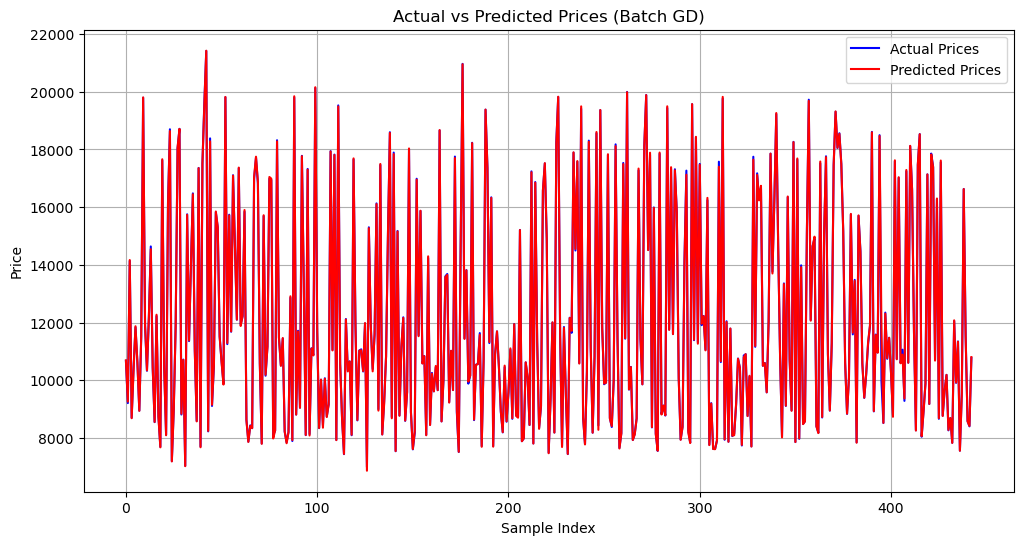

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_poly3, label='Actual Prices', color='blue')
plt.plot(y_pred_poly3_test, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices (Batch GD)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Degree 4

### Model Fitting

In [38]:
# Define polynomial features

poly_features = PolynomialFeatures(degree = 4, include_bias = False)

# Split the transformed data into training and test sets
X_train_poly4, X_test_poly4, y_train_poly4, y_test_poly4 = train_test_split(X, y, test_size = 0.2, random_state = 42)

# scale the data
X_poly4_train = scaler_X.fit_transform(X_train_poly4)
X_poly4_test = scaler_X.transform(X_test_poly4)

# convert into polnomial form
X_poly4_train_scaled = poly_features.fit_transform(X_train_poly4)
X_poly4_test_scaled = poly_features.transform(X_test_poly4)

print(X_poly4_train.shape, X_poly4_test.shape)

# Fit the linear model on polynomial features
model.fit(X_poly4_train_scaled, y_train_poly4)

(1769, 4) (443, 4)


LinearRegression()

### Predictions

In [40]:
# Predict and evaluate performance
y_pred_poly4_test = model.predict(X_poly4_test_scaled)

# Predict on the training data
y_pred_poly4_train = model.predict(X_poly4_train_scaled)

### Performance Metrics

In [42]:
# Calculate performance metrics for polynomial regression

MAE_poly4_test = metrics.mean_absolute_error(y_test_poly4, y_pred_poly4_test)
MSE_poly4_test = metrics.mean_squared_error(y_test_poly4, y_pred_poly4_test)
R2_poly4_test = metrics.r2_score(y_test_poly4, y_pred_poly4_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_poly4_train = metrics.mean_absolute_error(y_train_poly4, y_pred_poly4_train)
MSE_poly4_train = metrics.mean_squared_error(y_train_poly4, y_pred_poly4_train)
R2_poly4_train = metrics.r2_score(y_train_poly4, y_pred_poly4_train)

# Print the test and train metrics

print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_poly4_test}\nThe Mean Absolute Error is: {MAE_poly4_test}\nThe R-squared score is: {R2_poly4_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_poly4_train}\nThe Mean Absolute Error is: {MAE_poly4_train}\nThe R-squared score is: {R2_poly4_train}\n")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 1113309.4069638485
The Mean Absolute Error is: 146.48670747713462
The R-squared score is: 0.9228790688717939

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 40428.06004520171
The Mean Absolute Error is: 99.06000017285076
The R-squared score is: 0.9973056607024904



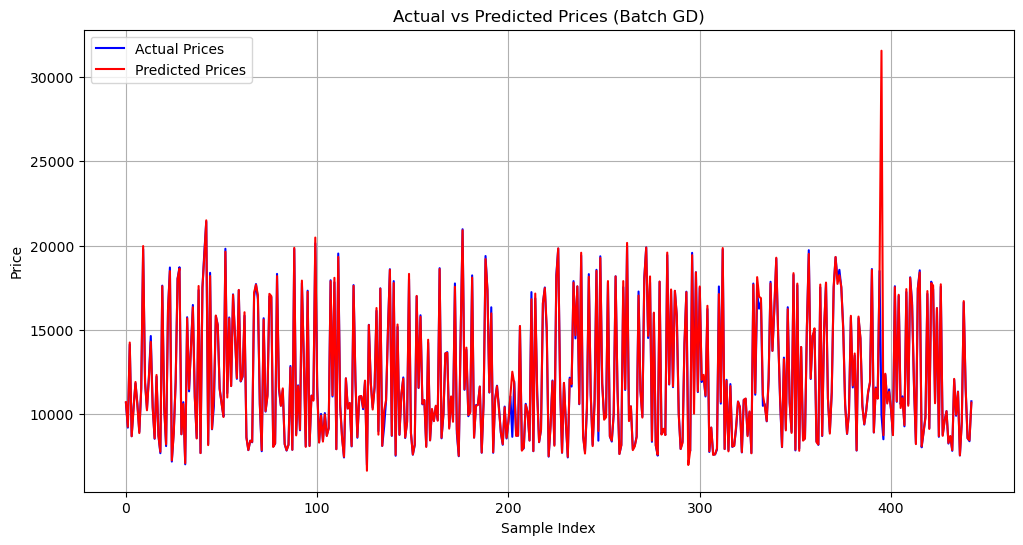

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_poly4, label='Actual Prices', color='blue')
plt.plot(y_pred_poly4_test, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices (Batch GD)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Training set has good r2 score but test set as bad r2 score so probable overfitting

# Gradient Descent Methods
**Instruction:** Implement batch, stochastic, and mini-batch gradient descent for linear regression.

In [46]:
# split the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [47]:
cost_history_Batch = []
cost_history_Stochastic = []
cost_history_Mini_Batch = []

## Batch Gradient Descent

In [49]:
def batch_gradient_descent(X, y, alpha=0.001, num_iters=1000):
    m, n = X.shape
    theta = np.random.randn(n) * 0.01  # Small random initialization

    for iter in range(num_iters):
        h = np.dot(X, theta)  # Hypothesis
        error = h - y.flatten()  # Error

         # Check for NaN values in the error
        if np.isnan(error).any():
            print(f"NaN detected in error at iteration {iter}")
            break

        gradient = np.dot(X.T, error) / m  # Gradient

        theta -= alpha * gradient  # Update parameters


        cost = (1 / (2 * m)) * np.dot(error.T, error)
        global cost_history_Batch
        cost_history_Batch.append(cost)


    return theta

In [50]:
# Run Batch Gradient Descent
print("Running Batch Gradient Descent...")
optimal_theta_batch = batch_gradient_descent(X_train_scaled, y_train)

Running Batch Gradient Descent...


In [51]:
# make predictions on test set
y_pred_batch_test = np.dot(X_test_scaled, optimal_theta_batch)

# make predictions for training set
y_pred_batch_train = np.dot(X_train_scaled, optimal_theta_batch)

In [52]:
# Calculate performance metrics for polynomial regression

MAE_batch_test = metrics.mean_absolute_error(y_test, y_pred_batch_test)
MSE_batch_test = metrics.mean_squared_error(y_test, y_pred_batch_test)
R2_batch_test = metrics.r2_score(y_test, y_pred_batch_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_batch_train = metrics.mean_absolute_error(y_train, y_pred_batch_train)
MSE_batch_train = metrics.mean_squared_error(y_train, y_pred_batch_train)
R2_batch_train = metrics.r2_score(y_train, y_pred_batch_train)

# Print metrics
print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_batch_test}\nThe Mean Absolute Error is: {MAE_batch_test}\nThe R-squared score is: {R2_batch_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_batch_train}\nThe Mean Absolute Error is: {MAE_batch_train}\nThe R-squared score is: {R2_batch_train}\n")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 155240978.99591237
The Mean Absolute Error is: 12459.146826727963
The R-squared score is: -9.753819894569352

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 155278846.93113717
The Mean Absolute Error is: 12460.645735816297
The R-squared score is: -9.348601908940704



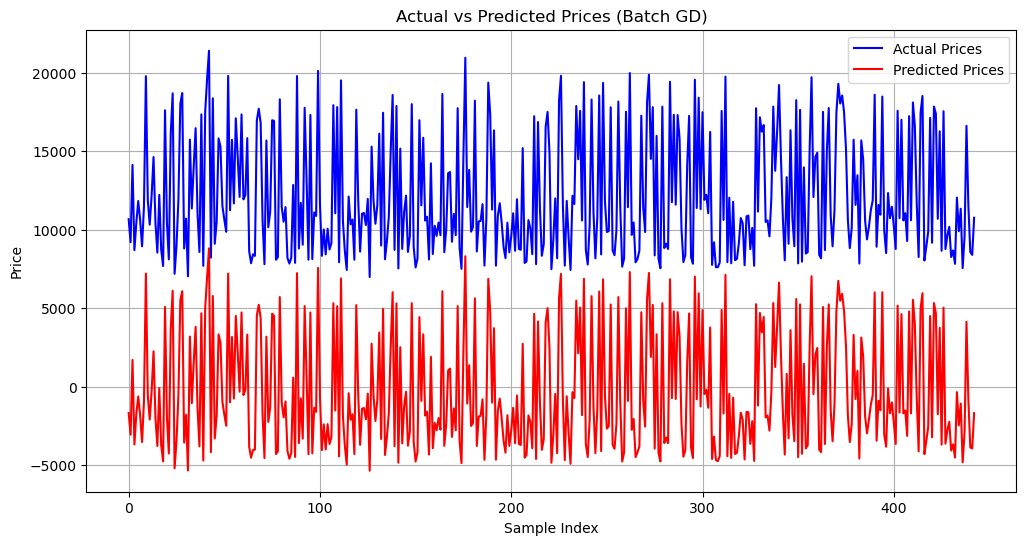

In [53]:
# Visualize Actual vs Predicted Prices
# batch
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred_batch_test, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices (Batch GD)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

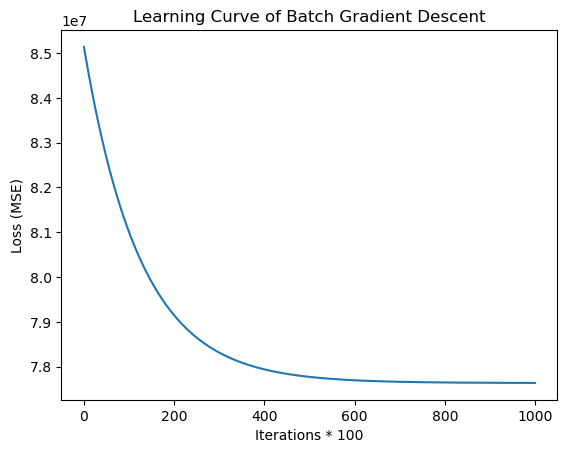

In [54]:
# Leaning Curves (loss vs iterations)
# Batch_GD
plt.plot(cost_history_Batch)
plt.xlabel("Iterations * 100")
plt.ylabel("Loss (MSE)")
plt.title("Learning Curve of Batch Gradient Descent")
plt.show()

## Stochastic Gradient Descent

In [56]:
def stochastic_gradient_descent(X, y, alpha=0.001, num_iters=1000):
    m, n = X.shape
    theta = np.random.randn(n) * 0.01  # Small random initialization

    for iter in range(num_iters):
        for i in range(m):
            h = np.dot(X[i], theta)  # Hypothesis for single example
            error = h - y[i]  # Error for single example
            gradient = X[i].reshape(-1, 1) * error  # Gradient

            theta -= alpha * gradient.flatten()  # Update parameters
            
            cost = (1 / (2 * m)) * np.sum((np.dot(X, theta) - y.flatten())**2)
            global cost_history_Stochastic
            cost_history_Stochastic.append(cost)

    return theta

In [57]:
# Run Stochastic Gradient Descent
print("Running Stochastic Gradient Descent...")
optimal_theta_stochastic= stochastic_gradient_descent(X_train_scaled, y_train)

Running Stochastic Gradient Descent...


In [58]:
# make predictions on test set
y_pred_stochastic_test = np.dot(X_test_scaled, optimal_theta_stochastic)

# make predictions for training set
y_pred_stochastic_train = np.dot(X_train_scaled, optimal_theta_stochastic)

In [59]:
# Calculate performance metrics for polynomial regression

MAE_stochastic_test = metrics.mean_absolute_error(y_test, y_pred_stochastic_test)
MSE_stochastic_test = metrics.mean_squared_error(y_test, y_pred_stochastic_test)
R2_stochastic_test = metrics.r2_score(y_test, y_pred_stochastic_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_stochastic_train = metrics.mean_absolute_error(y_train, y_pred_stochastic_train)
MSE_stochastic_train = metrics.mean_squared_error(y_train, y_pred_stochastic_train)
R2_stochastic_train = metrics.r2_score(y_train, y_pred_stochastic_train)

# Print metrics
print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_stochastic_test}\nThe Mean Absolute Error is: {MAE_stochastic_test}\nThe R-squared score is: {R2_stochastic_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_stochastic_train}\nThe Mean Absolute Error is: {MAE_stochastic_train}\nThe R-squared score is: {R2_stochastic_train}\n")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 157059172.05997965
The Mean Absolute Error is: 12516.378832123884
The R-squared score is: -9.879769375634204

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 155679101.54176515
The Mean Absolute Error is: 12460.645735816299
The R-squared score is: -9.375276988705073



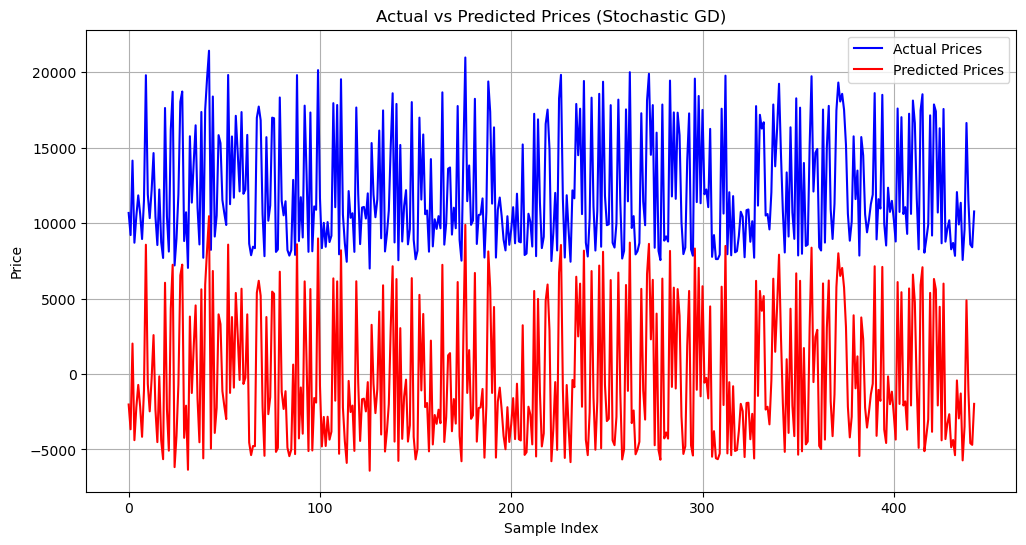

In [60]:
# Visualize Actual vs Predicted Prices
# stochastic
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred_stochastic_test, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices (Stochastic GD)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

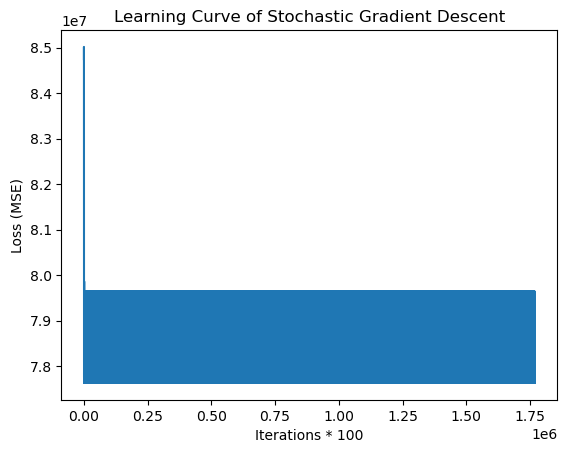

In [61]:
# Stochastic_GD
plt.plot(cost_history_Stochastic)
plt.xlabel("Iterations * 100")
plt.ylabel("Loss (MSE)")
plt.title("Learning Curve of Stochastic Gradient Descent")
plt.show()

## Mini-batch gradient descent

In [63]:
def mini_batch_gradient_descent(X, y, alpha=0.001, num_iters=1000, batch_size=32):
    m, n = X.shape
    theta = np.random.randn(n) * 0.01  # Small random initialization

    for iter in range(num_iters):
        indices = np.random.permutation(m)  # Shuffle the dataset
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_mini_batch = X_shuffled[i:i + batch_size]
            y_mini_batch = y_shuffled[i:i + batch_size]

            h = np.dot(X_mini_batch, theta)  # Hypothesis
            error = h - y_mini_batch.flatten()  # Error
            gradient = np.dot(X_mini_batch.T, error) / batch_size  # Gradient

            theta -= alpha * gradient  # Update parameters

            cost = (1 / (2 * m)) * np.sum((np.dot(X, theta) - y.flatten())**2)
            global cost_history_Mini_Batch
            cost_history_Mini_Batch.append(cost)

    return theta

In [64]:
# Run Mini-Batch Gradient Descent
print("Running Mini-Batch Gradient Descent...")
optimal_theta_mini_batch = mini_batch_gradient_descent(X_train_scaled, y_train)

Running Mini-Batch Gradient Descent...


In [65]:
# make predictions on test set
y_pred_mini_batch_test = np.dot(X_test_scaled, optimal_theta_mini_batch)

# make predictions for training set
y_pred_mini_batch_train = np.dot(X_train_scaled, optimal_theta_mini_batch)

In [66]:
# Calculate performance metrics for polynomial regression

MAE_mini_batch_test = metrics.mean_absolute_error(y_test, y_pred_mini_batch_test)
MSE_mini_batch_test = metrics.mean_squared_error(y_test, y_pred_mini_batch_test)
R2_mini_batch_test = metrics.r2_score(y_test, y_pred_mini_batch_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_mini_batch_train = metrics.mean_absolute_error(y_train, y_pred_mini_batch_train)
MSE_mini_batch_train = metrics.mean_squared_error(y_train, y_pred_mini_batch_train)
R2_mini_batch_train = metrics.r2_score(y_train, y_pred_mini_batch_train)

# Print metrics
print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_mini_batch_test}\nThe Mean Absolute Error is: {MAE_mini_batch_test}\nThe R-squared score is: {R2_mini_batch_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_mini_batch_train}\nThe Mean Absolute Error is: {MAE_mini_batch_train}\nThe R-squared score is: {R2_mini_batch_train}\n")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 155369792.08040586
The Mean Absolute Error is: 12464.504783162865
The R-squared score is: -9.762743007008263

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 155273746.43563658
The Mean Absolute Error is: 12460.645735816297
The R-squared score is: -9.348261985000535



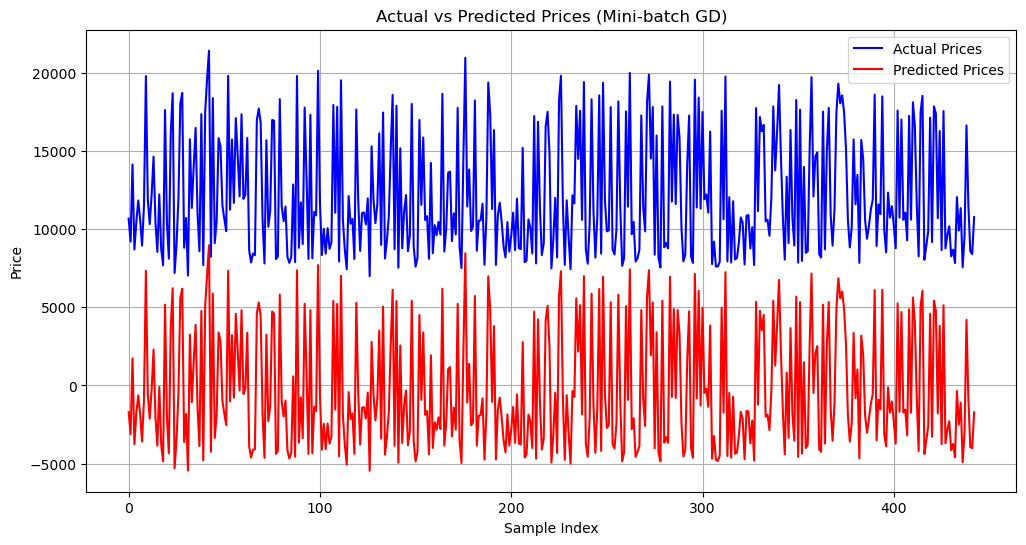

In [67]:
# Visualize Actual vs Predicted Prices
# mini-batch
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred_mini_batch_test, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices (Mini-batch GD)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

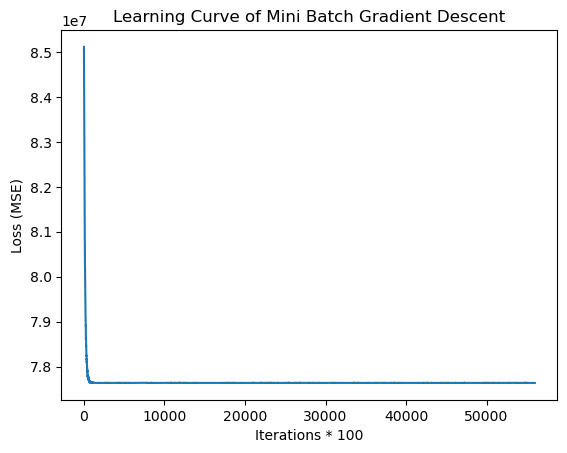

In [85]:
# Mini_Batch_GD
plt.plot(cost_history_Mini_Batch)
plt.xlabel("Iterations * 100")
plt.ylabel("Loss (MSE)")
plt.title("Learning Curve of Mini Batch Gradient Descent")
plt.show()

# Regularization Techniques
**Instruction:** Implement Ridge, Lasso regression, Elastic Net Regression, and Early Stopping using scikit-learn and compare the results.

## Ridge Regression

In [88]:
# Ridge Regression

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_ridge_test = ridge.predict(X_test_scaled)

# Predict on the training data
y_pred_ridge_train = ridge.predict(X_train_scaled)

In [89]:
# Calculate performance metrics for test set [MSE, MAE, R^2]

MAE_ridge_test = metrics.mean_absolute_error(y_test, y_pred_ridge_test)
MSE_ridge_test = metrics.mean_squared_error(y_test, y_pred_ridge_test)
R2_ridge_test = metrics.r2_score(y_test, y_pred_ridge_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_ridge_train = metrics.mean_absolute_error(y_train, y_pred_ridge_train)
MSE_ridge_train = metrics.mean_squared_error(y_train, y_pred_ridge_train)
R2_ridge_train = metrics.r2_score(y_train, y_pred_ridge_train)

# Print the test and train metrics

print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_ridge_test}\nThe Mean Absolute Error is: {MAE_ridge_test}\nThe R-squared score is: {R2_ridge_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_ridge_train}\nThe Mean Absolute Error is: {MAE_ridge_train}\nThe R-squared score is: {R2_ridge_train}\n")
print("******************************************************")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 2223.8918122259192
The Mean Absolute Error is: 30.455278563948404
The R-squared score is: 0.9998459470420222

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 1579.2861407655773
The Mean Absolute Error is: 29.143153884771504
The R-squared score is: 0.9998947480362322

******************************************************


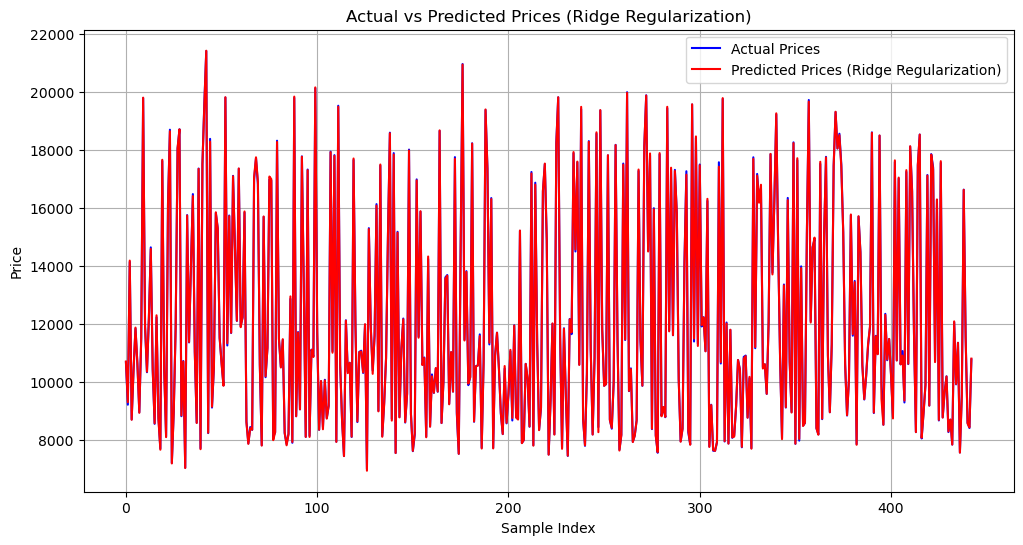

In [90]:
# Visualize Actual vs Predicted Prices
# ridge
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred_ridge_test, label='Predicted Prices (Ridge Regularization)', color='red')
plt.title('Actual vs Predicted Prices (Ridge Regularization)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Lasso Regression

In [92]:
# Lasso Regression

lasso = Lasso(alpha=0.2, max_iter = 50000) # alpha = lambda from formula
lasso.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_lasso_test = lasso.predict(X_test_scaled)

# Predict on the training data
y_pred_lasso_train = lasso.predict(X_train_scaled)

In [93]:
# Calculate performance metrics for test set [MSE, MAE, R^2]

MAE_lasso_test = metrics.mean_absolute_error(y_test, y_pred_lasso_test)
MSE_lasso_test = metrics.mean_squared_error(y_test, y_pred_lasso_test)
R2_lasso_test = metrics.r2_score(y_test, y_pred_lasso_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_lasso_train = metrics.mean_absolute_error(y_train, y_pred_lasso_train)
MSE_lasso_train = metrics.mean_squared_error(y_train, y_pred_lasso_train)
R2_lasso_train = metrics.r2_score(y_train, y_pred_lasso_train)

# Print the test and train metrics

print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_lasso_test}\nThe Mean Absolute Error is: {MAE_lasso_test}\nThe R-squared score is: {R2_lasso_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_lasso_train}\nThe Mean Absolute Error is: {MAE_lasso_train}\nThe R-squared score is: {R2_lasso_train}\n")
print("******************************************************")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 2512.53382096134
The Mean Absolute Error is: 33.144343496279035
The R-squared score is: 0.999825952294527

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 1903.9267240964264
The Mean Absolute Error is: 31.905693623085995
The R-squared score is: 0.9998731122743318

******************************************************


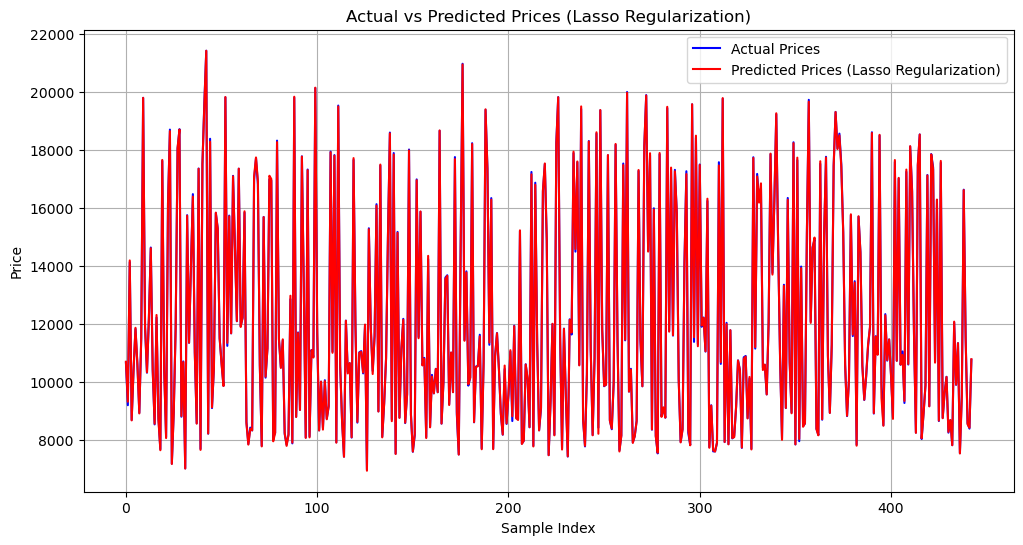

In [94]:
# Visualize Actual vs Predicted Prices
# lasso
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred_lasso_test, label='Predicted Prices (Lasso Regularization)', color='red')
plt.title('Actual vs Predicted Prices (Lasso Regularization)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Elastic Net

In [96]:
# Elastic Net Regression

# Initialize the ElasticNet model with desired parameters
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Example values for alpha and l1_ratio

# Fit the model to the training data
elastic_net.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_elastic_net_test = elastic_net.predict(X_test_scaled)

# Predict on the training data
y_pred_elastic_net_train = elastic_net.predict(X_train_scaled)

In [97]:
# Calculate performance metrics for test set [MSE, MAE, R^2]

MAE_elastic_net_test = metrics.mean_absolute_error(y_test, y_pred_elastic_net_test)
MSE_elastic_net_test = metrics.mean_squared_error(y_test, y_pred_elastic_net_test)
R2_elastic_net_test = metrics.r2_score(y_test, y_pred_elastic_net_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_elastic_net_train = metrics.mean_absolute_error(y_train, y_pred_elastic_net_train)
MSE_elastic_net_train = metrics.mean_squared_error(y_train, y_pred_elastic_net_train)
R2_elastic_net_train = metrics.r2_score(y_train, y_pred_elastic_net_train)

# Print the test and train metrics

print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_elastic_net_test}\nThe Mean Absolute Error is: {MAE_elastic_net_test}\nThe R-squared score is: {R2_elastic_net_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_elastic_net_train}\nThe Mean Absolute Error is: {MAE_elastic_net_train}\nThe R-squared score is: {R2_elastic_net_train}\n")
print("******************************************************")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 8074.042679071319
The Mean Absolute Error is: 67.31099525770308
The R-squared score is: 0.9994406966423853

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 8425.981620756258
The Mean Absolute Error is: 68.73647130872371
The R-squared score is: 0.9994384481131295

******************************************************


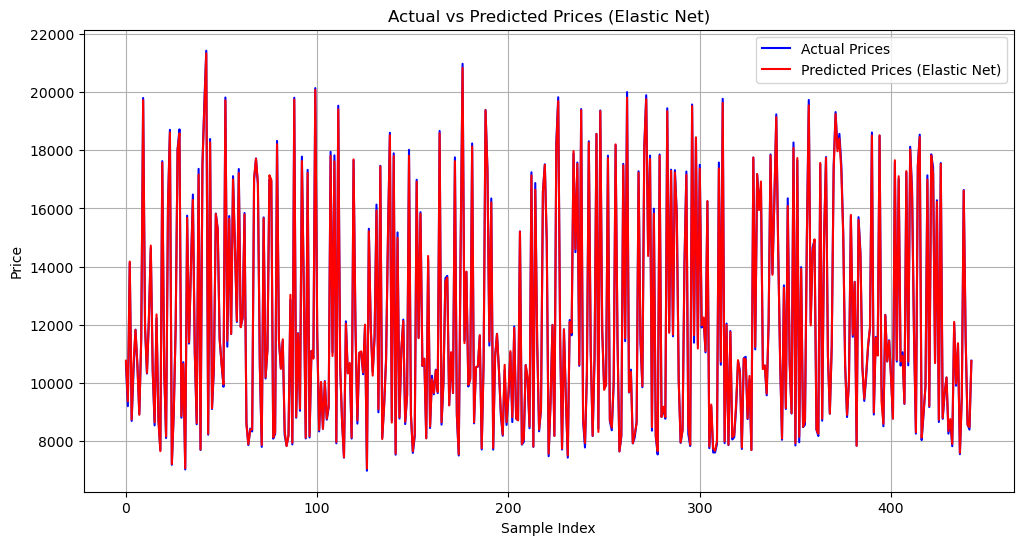

In [98]:
# Visualize Actual vs Predicted Prices
# elastic-net
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred_elastic_net_test, label='Predicted Prices (Elastic Net)', color='red')
plt.title('Actual vs Predicted Prices (Elastic Net)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Early Stopping

In [100]:
# Early Stopping
# creting an SGDRegressor with early stopping
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3, early_stopping=True,
                       validation_fraction=0.2, n_iter_no_change=5, random_state=42)

In [101]:
n_iter_no_change = 5
best_mse = np.inf
best_epoch = 0
best_r2 = -np.inf

for epoch in range(10000):
    sgd_reg.fit(X_train_scaled, y_train)  # Fit for a single epoch
    y_pred_early_stop_test = sgd_reg.predict(X_test_scaled)
    mse = metrics.mean_squared_error(y_test, y_pred_early_stop_test)
    r2 = metrics.r2_score(y_test, y_pred_early_stop_test)

    if mse < best_mse:
        best_mse = mse
        best_epoch = epoch
        best_r2 = r2
        best_predictions = y_pred_early_stop_test
    else:
        if epoch - best_epoch >= n_iter_no_change:
            print(f"Early stopping at epoch {epoch}")
            break


Early stopping at epoch 5


C:\Users\SOHAM\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SOHAM\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SOHAM\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SOHAM\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

## Performance Metrics

In [103]:
# Print the performance metrics
print("Best MSE:", best_mse)
print("Best R2 score:", best_r2)

Best MSE: 5982.334571677772
Best R2 score: 0.999585592999033


# Normal Equation
**Instruction:** Implement the normal equation method for linear regression.

In [105]:
# Define Normal equation. Inputs: X and y, Output: theta
def normal_equation(X, y):
    
    # Add a column of ones to X_train_scaled for the intercept term
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]

    # Calculate the optimal theta using the normal equation
    theta_best = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    
    return theta_best

# Use the normal equation to find theta
theta_ne = normal_equation(X_train_scaled, y_train)

# Add a column of ones to test & train for the intercept term
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

In [106]:
# Prediction on the test data
y_pred_ne_test = X_test_bias @ theta_ne

# prediction on the training data
y_pred_ne_train = X_train_bias @ theta_ne

In [107]:
# Calculate performance metrics for test set [MSE, MAE, R^2]

MAE_ne_test = metrics.mean_absolute_error(y_test, y_pred_ne_test)
MSE_ne_test = metrics.mean_squared_error(y_test, y_pred_ne_test)
R2_ne_test = metrics.r2_score(y_test, y_pred_ne_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_ne_train = metrics.mean_absolute_error(y_train, y_pred_ne_train)
MSE_ne_train = metrics.mean_squared_error(y_train, y_pred_ne_train)
R2_ne_train = metrics.r2_score(y_train, y_pred_ne_train)

# Print the test and train metrics

print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_ne_test}\nThe Mean Absolute Error is: {MAE_ne_test}\nThe R-squared score is: {R2_ne_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_ne_train}\nThe Mean Absolute Error is: {MAE_ne_train}\nThe R-squared score is: {R2_ne_train}\n")
print("******************************************************")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 1686.9093070891554
The Mean Absolute Error is: 26.614262364397966
The R-squared score is: 0.99988314477927

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 1333.1289928467716
The Mean Absolute Error is: 25.45809920679752
The R-squared score is: 0.9999111532477675

******************************************************


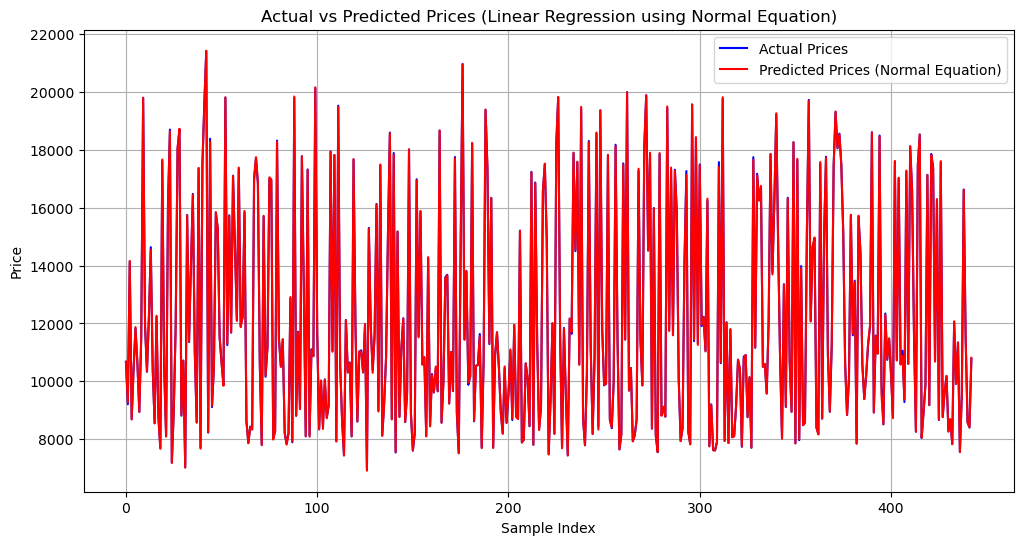

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred_ne_test, label='Predicted Prices (Normal Equation)', color='red')
plt.title('Actual vs Predicted Prices (Linear Regression using Normal Equation)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Implement Linear Regression using SVD

In [110]:
# Define SVD equation. Inputs: X and y, Output: theta
def svd_equation(X, y):
    # performing SVD
    U, S, VT = svd(X, full_matrices=False)

    # pseudo inv of S
    S_inv = np.diag(1 / S)

    # calculating theta
    Theta = VT.T @ S_inv @ U.T @ y

    return Theta

# Use the svd equation to find theta
theta = svd_equation(X_train_scaled, y_train)

In [111]:
# Make predictions on the test set
y_pred_svd_test = X_test_scaled @ theta

# Make predictions on the training set
y_pred_svd_train = X_train_scaled @ theta

In [112]:
# Calculate performance metrics for test set [MSE, MAE, R^2]

MAE_svd_test = metrics.mean_absolute_error(y_test, y_pred_svd_test)
MSE_svd_test = metrics.mean_squared_error(y_test, y_pred_svd_test)
R2_svd_test = metrics.r2_score(y_test, y_pred_svd_test)

# Calculate performance metrics for training set [MSE, MAE, R^2]

MAE_svd_train = metrics.mean_absolute_error(y_train, y_pred_svd_train)
MSE_svd_train = metrics.mean_squared_error(y_train, y_pred_svd_train)
R2_svd_train = metrics.r2_score(y_train, y_pred_svd_train)

# Print the test and train metrics

print("******************************************************")
print("Printing performance measures for test set:\n")
print(f"The Mean Squared Error is: {MSE_svd_test}\nThe Mean Absolute Error is: {MAE_svd_test}\nThe R-squared score is: {R2_svd_test}\n")
print("******************************************************")
print("Printing performance measures for training set:\n")
print(f"The Mean Squared Error is: {MSE_svd_train}\nThe Mean Absolute Error is: {MAE_svd_train}\nThe R-squared score is: {R2_svd_train}\n")

******************************************************
Printing performance measures for test set:

The Mean Squared Error is: 155330621.8274642
The Mean Absolute Error is: 12463.103183284851
The R-squared score is: -9.760029613624093

******************************************************
Printing performance measures for training set:

The Mean Squared Error is: 155269025.2825097
The Mean Absolute Error is: 12460.645735816297
The R-squared score is: -9.347947342438289



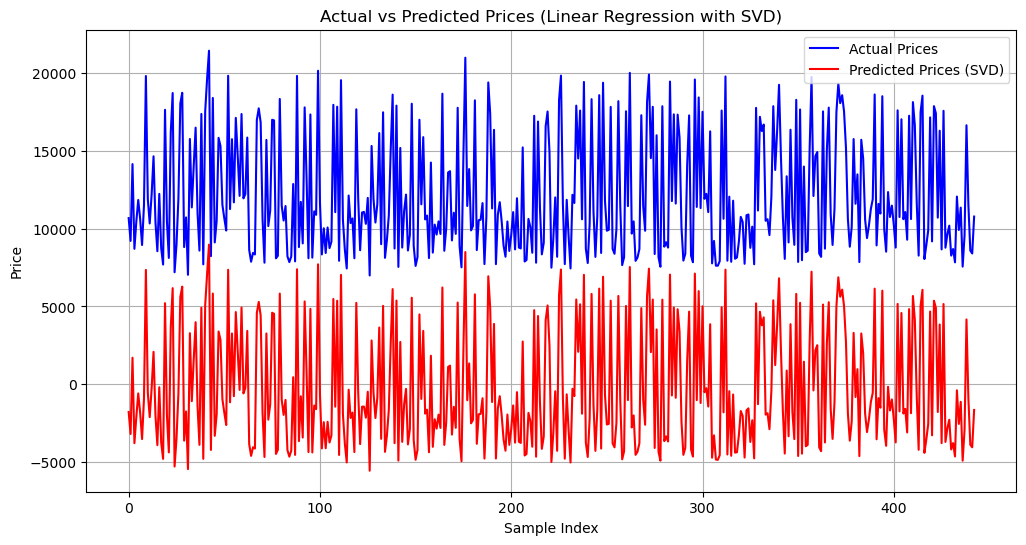

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred_svd_test, label='Predicted Prices (SVD)', color='red')
plt.title('Actual vs Predicted Prices (Linear Regression with SVD)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Performance Metrics and Computational Analysis
**Instruction:** Compare the performance and computational time of all models implemented.

In [115]:
# Example: Timing the training process
start_time_lin = time.time()
model.fit(X_train_scaled, y_train)
end_time_lin = time.time()
linear_time = end_time_lin - start_time_lin
print(f'Training Time (Linear Regression): {linear_time} seconds')

Training Time (Linear Regression): 0.011408090591430664 seconds


In [116]:
start_time_poly2 = time.time()
model.fit(X_poly2_train_scaled, y_train)
end_time_poly2 = time.time()
poly2_time = start_time_poly2 - end_time_poly2
print(f'Training Time (Polynomial Regression of degree 2): {-poly2_time} seconds')

Training Time (Polynomial Regression of degree 2): 0.00636601448059082 seconds


In [117]:
start_time_poly3 = time.time()
model.fit(X_poly3_train_scaled, y_train)
end_time_poly3 = time.time()
poly3_time = (start_time_poly3 - end_time_poly3)
print(f'Training Time (Polynomial Regression of degree 3): {-poly3_time} seconds')

Training Time (Polynomial Regression of degree 3): 0.016622543334960938 seconds


In [118]:
start_time_poly4 = time.time()
model.fit(X_poly4_train_scaled, y_train)
end_time_poly4 = time.time()
poly4_time = start_time_poly4 - end_time_poly4
print(f'Training Time (Polynomial Regression of degree 4): {-poly4_time} seconds')

Training Time (Polynomial Regression of degree 4): 0.027924060821533203 seconds


In [119]:
start_time_batch = time.time()
batch_gradient_descent(X_train_scaled, y_train)
end_time_batch = time.time()
batch_time = start_time_batch - end_time_batch
print(f'Training Time (Batch Gradient Descent): {-batch_time} seconds')

Training Time (Batch Gradient Descent): 0.2871968746185303 seconds


In [120]:
start_time_stochastic = time.time()
stochastic_gradient_descent(X_train_scaled, y_train)
end_time_stochastic = time.time()
stochastic_time = start_time_stochastic - end_time_stochastic
print(f'Training Time (Stochastic Gradient Descent): {-stochastic_time} seconds')

Training Time (Stochastic Gradient Descent): 198.24251437187195 seconds


In [121]:
start_time_mini = time.time()
mini_batch_gradient_descent(X_train_scaled, y_train)
end_time_mini = time.time()
mini_time = start_time_mini - end_time_mini
print(f'Training Time (Mini Batch Gradient Descent): {-mini_time} seconds')

Training Time (Mini Batch Gradient Descent): 6.1695356369018555 seconds


In [122]:
start_time_ridge = time.time()
ridge.fit(X_train_scaled, y_train)
end_time_ridge = time.time()
ridge_time = start_time_ridge - end_time_ridge
print(f'Training Time (Ridge Regularization): {-ridge_time} seconds')

Training Time (Ridge Regularization): 0.007984638214111328 seconds


In [123]:
start_time_lasso = time.time()
lasso.fit(X_train_scaled, y_train)
end_time_lasso = time.time()
lasso_time = start_time_lasso - end_time_lasso
print(f'Training Time (Lasso Regularization): {-lasso_time} seconds')

Training Time (Lasso Regularization): 0.16380858421325684 seconds


In [124]:
start_time_elastic = time.time()
elastic_net.fit(X_train_scaled, y_train)
end_time_elastic = time.time()
elastic_time = start_time_lasso - end_time_lasso
print(f'Training Time (Elastic Net Regularization): {-elastic_time} seconds')

Training Time (Elastic Net Regularization): 0.16380858421325684 seconds


In [125]:
start_time_early = time.time()
sgd_reg.fit(X_train_scaled, y_train)
end_time_early = time.time()
early_time = start_time_early - end_time_early
print(f'Training Time (Early Stop Regularization): {-early_time} seconds')

Training Time (Early Stop Regularization): 0.0403447151184082 seconds


C:\Users\SOHAM\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
start_time_ne = time.time()
normal_equation(X_train_scaled, y_train)
end_time_ne = time.time()
ne_time = start_time_ne - end_time_ne
print(f'Training Time (Normal Equation): {-ne_time} seconds')

Training Time (Normal Equation): 0.0029926300048828125 seconds


In [127]:
start_time_svd = time.time()
svd_equation(X_train_scaled, y_train)
end_time_svd = time.time()
svd_time = start_time_svd - end_time_svd
print(f'Training Time (Single Value Decomposition): {-svd_time} seconds')

Training Time (Single Value Decomposition): 0.008890628814697266 seconds


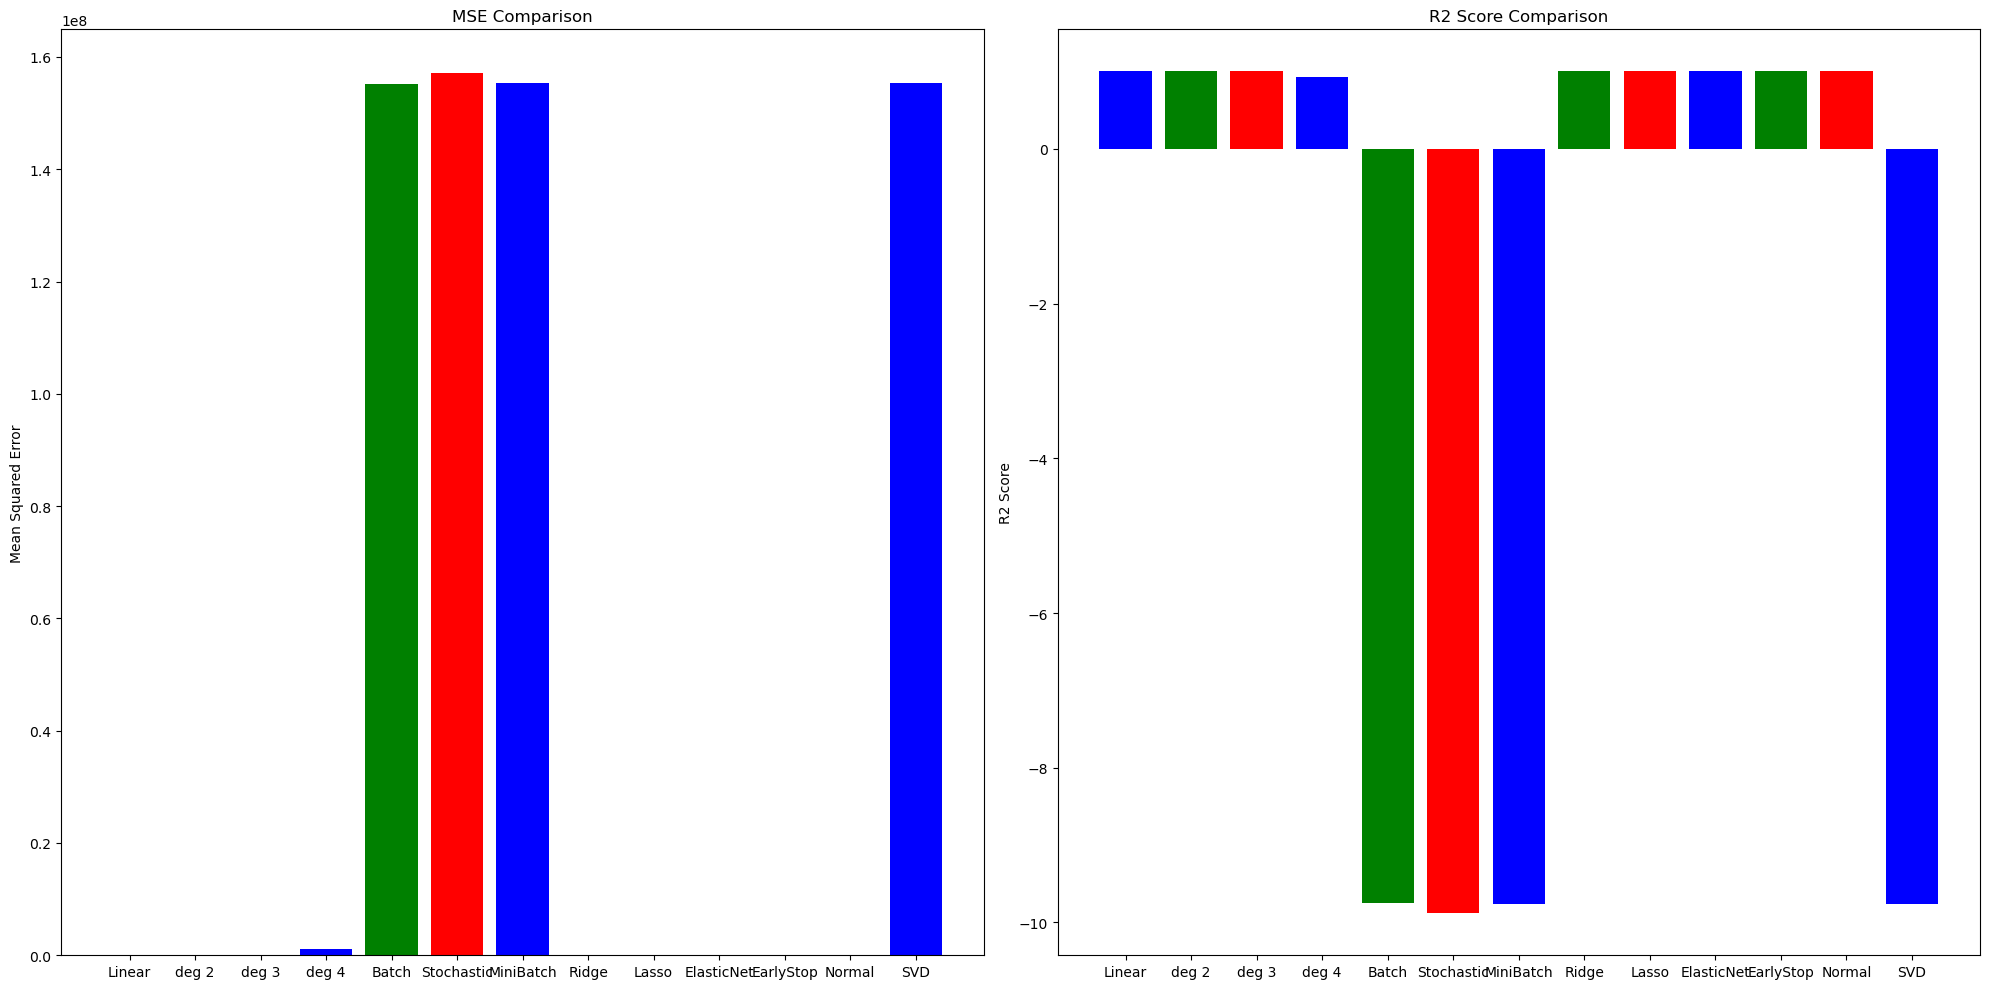

In [128]:
# Plot performance comparison (students to fill in the details)
# Students should create plots comparing the performance metrics (MSE, R2) and computational time for each model.

# Metrics: MSE and R2 Score
models = ['Linear', 'deg 2', 'deg 3', 'deg 4', 
          'Batch', 'Stochastic', 'MiniBatch', 'Ridge', 'Lasso', 'ElasticNet', 'EarlyStop', 'Normal', 'SVD']
mse_scores = [
    metrics.mean_squared_error(y_test, y_pred_lin_test),
    metrics.mean_squared_error(y_test, y_pred_poly2_test),
    metrics.mean_squared_error(y_test, y_pred_poly3_test),
    metrics.mean_squared_error(y_test, y_pred_poly4_test),
    metrics.mean_squared_error(y_test, y_pred_batch_test),
    metrics.mean_squared_error(y_test, y_pred_stochastic_test),
    metrics.mean_squared_error(y_test, y_pred_mini_batch_test),
    metrics.mean_squared_error(y_test, y_pred_ridge_test),
    metrics.mean_squared_error(y_test, y_pred_lasso_test),
    metrics.mean_squared_error(y_test, y_pred_elastic_net_test),
    metrics.mean_squared_error(y_test, y_pred_early_stop_test),
    metrics.mean_squared_error(y_test, y_pred_ne_test),
    metrics.mean_squared_error(y_test, y_pred_svd_test)
]

r2_scores = [
    metrics.r2_score(y_test, y_pred_lin_test),
    metrics.r2_score(y_test, y_pred_poly2_test),
    metrics.r2_score(y_test, y_pred_poly3_test),
    metrics.r2_score(y_test, y_pred_poly4_test),
    metrics.r2_score(y_test, y_pred_batch_test),
    metrics.r2_score(y_test, y_pred_stochastic_test),
    metrics.r2_score(y_test, y_pred_mini_batch_test),
    metrics.r2_score(y_test, y_pred_ridge_test),
    metrics.r2_score(y_test, y_pred_lasso_test),
    metrics.r2_score(y_test, y_pred_elastic_net_test),
    metrics.r2_score(y_test, y_pred_early_stop_test),
    metrics.r2_score(y_test, y_pred_ne_test),
    metrics.r2_score(y_test, y_pred_svd_test)
]

# Plotting MSE and R2 score for comparison
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot MSE
ax[0].bar(models, mse_scores, color=['blue', 'green', 'red'])
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('Mean Squared Error')

# Plot R2 Score
ax[1].bar(models, r2_scores, color=['blue', 'green', 'red'])
ax[1].set_title('R2 Score Comparison')
ax[1].set_ylabel('R2 Score')

plt.tight_layout()
plt.show()


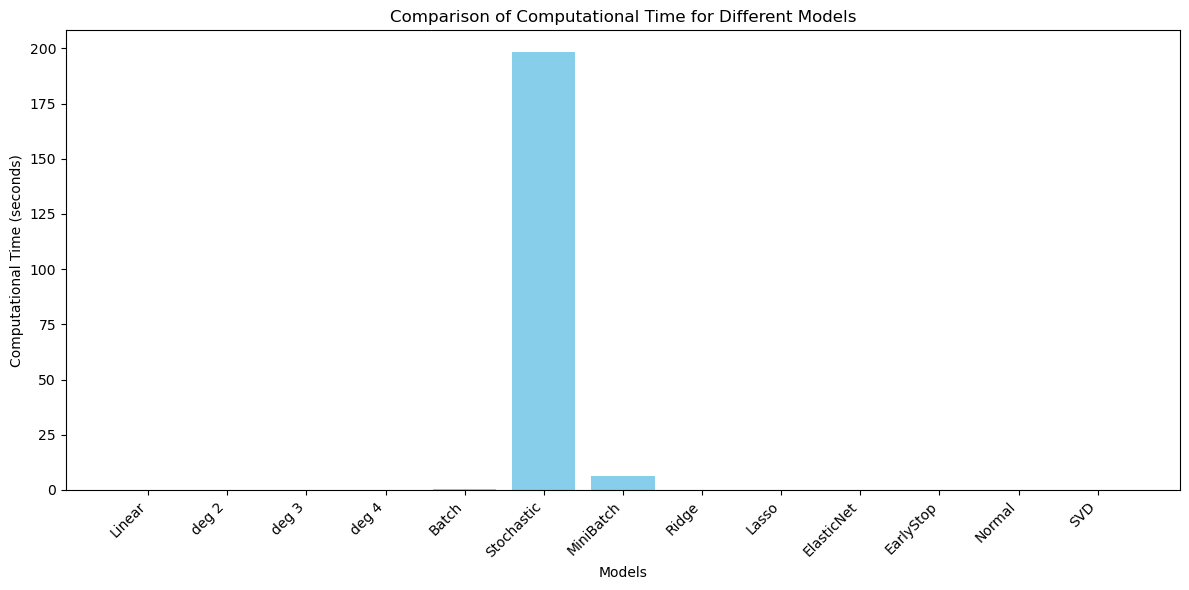

In [129]:
# Model names and computational times
models = ['Linear', 'deg 2', 'deg 3', 'deg 4', 
          'Batch', 'Stochastic', 'MiniBatch', 'Ridge', 'Lasso', 'ElasticNet', 'EarlyStop', 'Normal', 'SVD']

# Example computational times (in seconds, replace with actual values)
computational_time = [
    linear_time, -poly2_time, -poly3_time, -poly4_time, 
    -batch_time, -stochastic_time, -mini_time, -ridge_time, -lasso_time, 
    -elastic_time, -early_time, -ne_time, -svd_time]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(models, computational_time, color='skyblue')

# Add titles and labels
plt.title('Comparison of Computational Time for Different Models')
plt.xlabel('Models')
plt.ylabel('Computational Time (seconds)')
plt.xticks(rotation=45, ha='right')  # Rotate model names for better readability
plt.tight_layout()

# Show the plot
plt.show()


# Conclusion
**Instruction:** Summarize the findings from the analysis, including which models performed best in terms of accuracy and computational efficiency.

In this project, we explored various regression techniques to predict stock prices using historical data. Our analysis included Simple Linear Regression, Polynomial Regression (degrees 2, 3, and 4), and Regularization Techniques such as Ridge, Lasso, and Elastic Net Regression. We also implemented Gradient Descent Methods including batch, stochastic, and mini-batch gradient descent.

Key Findings:

Linear Regression provided a strong baseline with high R-squared values, indicating a good fit.
Polynomial Regression improved the model’s performance up to a certain degree, but higher degrees led to overfitting.
Regularization Techniques like Ridge and Lasso helped in reducing overfitting and improved generalization.
Gradient Descent Methods showed varying performance, with mini-batch gradient descent balancing between convergence speed and accuracy.
Overall, the project demonstrated the effectiveness of different regression techniques and highlighted the importance of choosing the right model and regularization methods to achieve accurate predictions. Future work could involve exploring more advanced models and feature engineering to further enhance prediction accuracy.

### *Loading Data*
- *Dataset*: The dataset used is the NSEI 2015-2023 stock prices.
- *Initial Steps*: Redundant columns are dropped, and a new column 'Previous_Close' is created to store the previous day's closing price.

### *Data Preprocessing*
- *Handling Missing Values*: Missing values are checked and handled.
- *Feature Scaling*: Features are scaled using StandardScaler to normalize the data, which helps in improving the performance of the model.

### *Simple Linear Regression*
- *Model Training*: A linear regression model is trained on the scaled features.
- *Performance Metrics*: The model shows a high R-squared score, indicating a good fit.

### *Polynomial Regression*
- *Higher Degrees*: Polynomial regression is implemented for degrees 2, 3, and 4.
- *Overfitting*: Higher degrees show signs of overfitting, where the model performs well on training data but poorly on test data.

### *Gradient Descent Methods*
- *Batch, Stochastic, and Mini-Batch*: Different gradient descent methods are implemented to optimize the model parameters.
- *Performance*: Batch and Mini-Batch methods show poor performance, indicating issues with the model or data.

### *Regularization Techniques*
- *Ridge, Lasso, Elastic Net*: These techniques are used to prevent overfitting by adding penalties to the model.
- *Results*: Ridge and Lasso show better performance compared to Elastic Net.

### *Early Stopping*
- *SGDRegressor*: Early stopping is used to prevent overfitting by stopping the training when the performance on the validation set stops improving.

This project demonstrates various regression techniques and highlights the importance of preprocessing, feature scaling, and regularization in building effective models.